Tutorial of `AdventCalendar` module in `s2s` package.

In [1]:
import numpy as np
import pandas as pd
import s2spy.time

In [2]:
calendar = s2spy.time.AdventCalendar(anchor=(12, 31), freq="7d")
calendar
print(calendar)

AdventCalendar(month=12, day=31, freq=7d, n_targets=1)


Create AdventCalendar instance.

In [3]:
calendar = s2spy.time.AdventCalendar(anchor=(11, 30), freq='90d', n_targets=1)
calendar

AdventCalendar(month=11, day=30, freq=90d, n_targets=1)

Map the calendar to a single year.

In [4]:
calendar = calendar.map_years(2020, 2020)
calendar.show()

i_interval,(target) 0,1,2,3
anchor_year,,,,
2020,"(2020-09-01, 2020-11-30]","(2020-06-03, 2020-09-01]","(2020-03-05, 2020-06-03]","(2019-12-06, 2020-03-05]"


Map the calendar to multiple years (start year - end year).

In [5]:
calendar = calendar.map_years(2020, 2022)
calendar.show()

i_interval,(target) 0,1,2,3
anchor_year,,,,
2022,"(2022-09-01, 2022-11-30]","(2022-06-03, 2022-09-01]","(2022-03-05, 2022-06-03]","(2021-12-05, 2022-03-05]"
2021,"(2021-09-01, 2021-11-30]","(2021-06-03, 2021-09-01]","(2021-03-05, 2021-06-03]","(2020-12-05, 2021-03-05]"
2020,"(2020-09-01, 2020-11-30]","(2020-06-03, 2020-09-01]","(2020-03-05, 2020-06-03]","(2019-12-06, 2020-03-05]"


The calendar can also be displayed in a plot, using `.visualize()`.

This makes it easier to look at calendars containing more intervals:

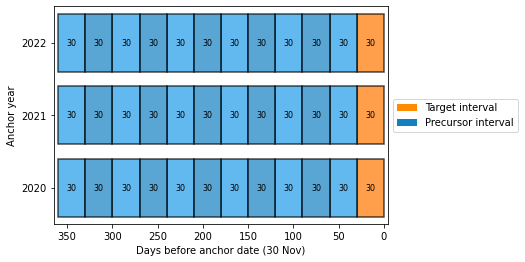

In [6]:
larger_calendar = s2spy.time.AdventCalendar(anchor=(11, 30), freq='30d', n_targets=1)
larger_calendar.map_years(2020, 2022)
larger_calendar.visualize(add_freq=True)

For a more informative view, `bokeh` can be used as an alternative method.

Note that this is an optional package, which has to be separately installed with either:

`pip install bokeh` **or** `conda install bokeh`

In [7]:
from bokeh import io
io.output_notebook()

larger_calendar.visualize_interactive(relative_dates=False)

Loading BokehJS ...

Flatten the indices.

In [8]:
intervals = calendar.map_years(2020, 2022).flat
intervals

anchor_year  i_interval
2022         0             (2022-09-01, 2022-11-30]
             1             (2022-06-03, 2022-09-01]
             2             (2022-03-05, 2022-06-03]
             3             (2021-12-05, 2022-03-05]
2021         0             (2021-09-01, 2021-11-30]
             1             (2021-06-03, 2021-09-01]
             2             (2021-03-05, 2021-06-03]
             3             (2020-12-05, 2021-03-05]
2020         0             (2020-09-01, 2020-11-30]
             1             (2020-06-03, 2020-09-01]
             2             (2020-03-05, 2020-06-03]
             3             (2019-12-06, 2020-03-05]
dtype: interval

Set the maximum lag

In [9]:
calendar.set_max_lag(2)
calendar.show()

i_interval,(target) 0,1,2
anchor_year,,,
2022,"(2022-09-01, 2022-11-30]","(2022-06-03, 2022-09-01]","(2022-03-05, 2022-06-03]"
2021,"(2021-09-01, 2021-11-30]","(2021-06-03, 2021-09-01]","(2021-03-05, 2021-06-03]"
2020,"(2020-09-01, 2020-11-30]","(2020-06-03, 2020-09-01]","(2020-03-05, 2020-06-03]"


Map the calendar to the input data.

In [10]:
# create dummy data for testing
time_index = pd.date_range('20171110', '20211211', freq='10d')
var = np.random.random(len(time_index))
# generate input data
test_data = pd.Series(var, index=time_index)
# map year to data
calendar = calendar.map_to_data(test_data)
calendar.show()

i_interval,(target) 0,1,2
anchor_year,,,
2021,"(2021-09-01, 2021-11-30]","(2021-06-03, 2021-09-01]","(2021-03-05, 2021-06-03]"
2020,"(2020-09-01, 2020-11-30]","(2020-06-03, 2020-09-01]","(2020-03-05, 2020-06-03]"
2019,"(2019-09-01, 2019-11-30]","(2019-06-03, 2019-09-01]","(2019-03-05, 2019-06-03]"
2018,"(2018-09-01, 2018-11-30]","(2018-06-03, 2018-09-01]","(2018-03-05, 2018-06-03]"
